In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
hhv = pd.read_csv("./dataset/hhv2pub.csv")
ldtv = pd.read_csv("./dataset/ldtv2pub.csv")
perv = pd.read_csv("./dataset/perv2pub.csv")
trip = pd.read_csv("./dataset/tripv2pub.csv")
vehv = pd.read_csv("./dataset/vehv2pub.csv")

In [3]:
print("Household: ", hhv.shape)
print(hhv.head())
print("Long Distance: ", ldtv.shape)
print(ldtv.head())
print("Person: ", perv.shape)
print(perv.head())
print("Trip: ", trip.shape) 
print(trip.head())
print("Vehicle: ", vehv.shape)
print(vehv.head())

Household:  (7893, 35)
      HOUSEID       WTHHFIN     WTHHFIN5D     WTHHFIN2D  NUMADLT  HOMEOWN  \
0  9000013002   4621.758002      0.000000  13946.191168        2        1   
1  9000013016   2982.998407   3878.814279      0.000000        2        3   
2  9000013026   9979.573402  14700.796695      0.000000        1        3   
3  9000013039  10355.890735  13150.678996      0.000000        2        3   
4  9000013041   4926.862529   7061.357485      0.000000        1        1   

   HOMETYPE  RAIL  CENSUS_D  CENSUS_R  ...  URBAN  URBANSIZE  URBRUR  PPT517  \
0         1     1         1         1  ...      1          4       1       2   
1         3     2         1         1  ...      1          2       1       0   
2         3     1         1         1  ...      1          4       1       0   
3         3     1         1         1  ...      1          4       1       2   
4         2     2         1         1  ...      1          3       1       0   

   YOUNGCHILD  RESP_CNT  URBRUR_2

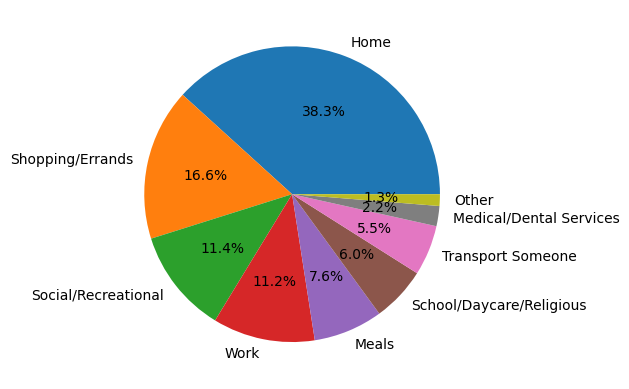

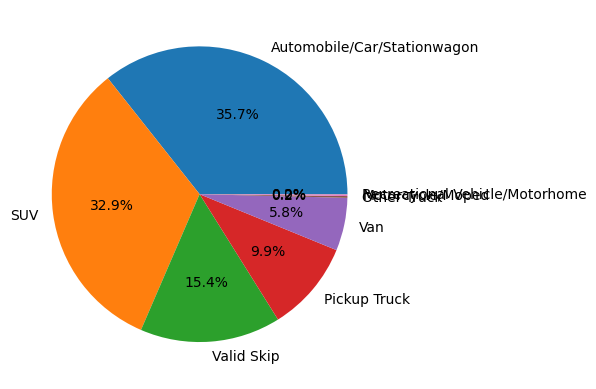

In [4]:
# What is the breakdown of transportation mode by trip purpose? of work/school/leisure trips done by walking, biking, driving?
# print(trip.head())

# Trip purpose summary
WHYTRP1S_counts = trip["WHYTRP1S"].value_counts()
# print(WHYTRP1S_counts)
WHYTRP1S_labels = ['Home', 'Shopping/Errands', 'Social/Recreational', 'Work', 'Meals', 'School/Daycare/Religious', 'Transport Someone', 'Medical/Dental Services', 'Other']

# Plot the pie chart
plt.pie(WHYTRP1S_counts, labels=WHYTRP1S_labels, autopct='%1.1f%%')
plt.show()

# Vehicle Type
VEHTYPE_counts = trip["VEHTYPE"].value_counts()
# print(VEHTYPE_counts)
VEHTYPE_labels = ['Automobile/Car/Stationwagon', 'SUV', 'Valid Skip', 'Pickup Truck', 'Van', 'Other Truck', 'Motorcycle/Moped', 'Recreational Vehicle/Motorhome']

# Plot the pie chart
plt.pie(VEHTYPE_counts, labels=VEHTYPE_labels , autopct='%1.1f%%')
plt.show()

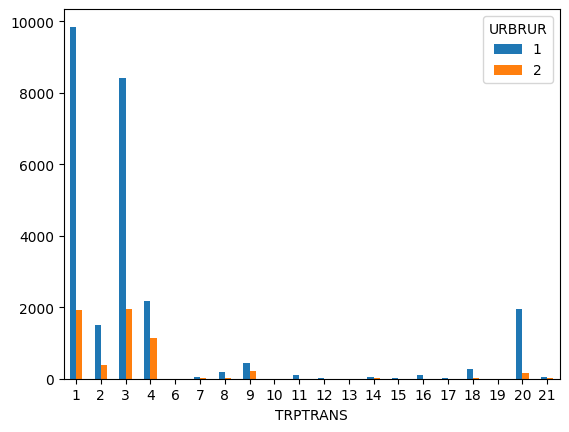

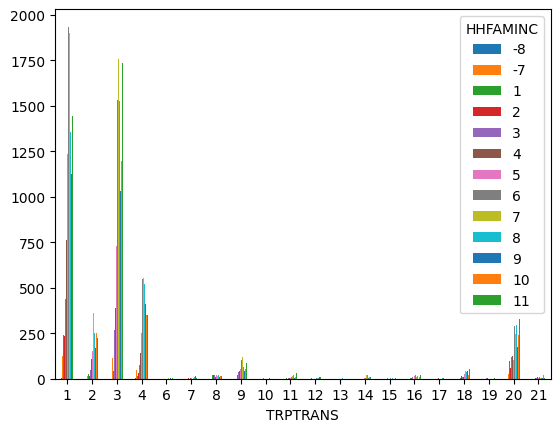

In [5]:
# Creating crosstab
crosstb = pd.crosstab(trip["TRPTRANS"], trip["URBRUR"])
 
# Creating barplot
barplot = crosstb.plot.bar(rot=0)

# Creating crosstab
crosstb2 = pd.crosstab(trip["TRPTRANS"], trip["HHFAMINC"])
 
# Creating barplot
barplot = crosstb2.plot.bar(rot=0)

[Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11')]

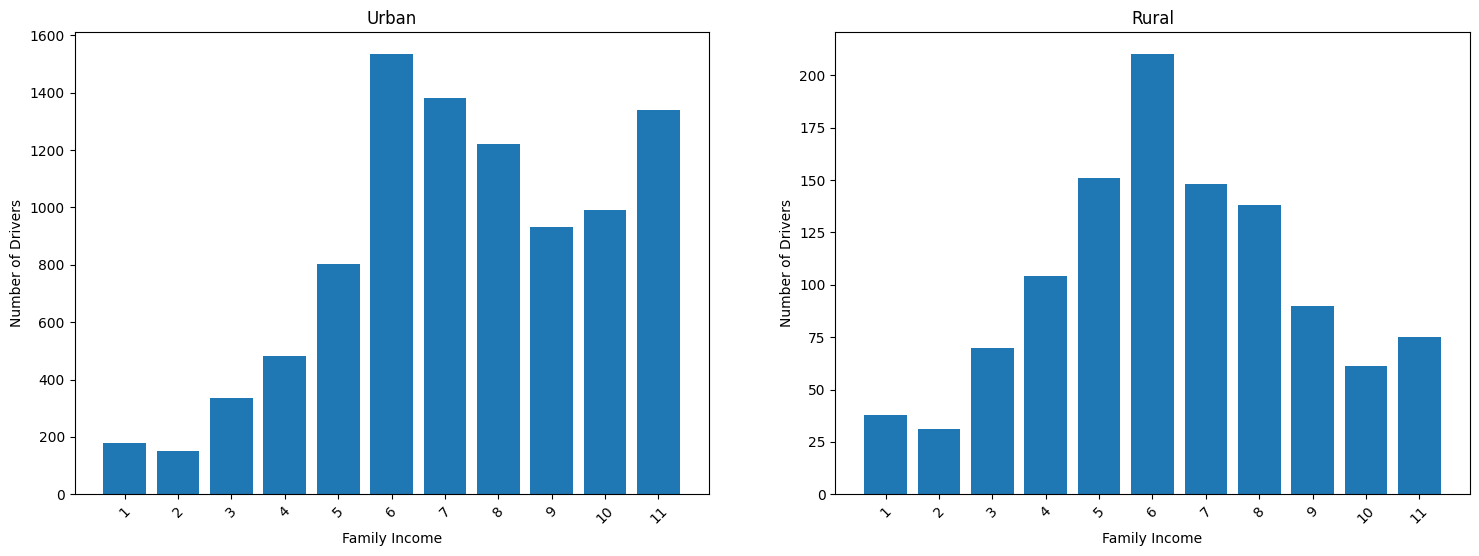

In [6]:
# Splitting urban and rural areas
urban_df = hhv[hhv['URBAN'] == 1]
rural_df = hhv[hhv['URBAN'] == 2]

excluded_values = [-7, -8]
urban_df = urban_df[~urban_df['HHFAMINC'].isin(excluded_values)]
rural_df = rural_df[~rural_df['HHFAMINC'].isin(excluded_values)]

# Aggregate the data to get the total number of drivers per household income for areas
drivers_per_income_urban = urban_df.groupby('HHFAMINC')['DRVRCNT'].sum().reset_index()
drivers_per_income_rural = rural_df.groupby('HHFAMINC')['DRVRCNT'].sum().reset_index()

# Plot the bar charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Urban areas plot
axes[0].bar(drivers_per_income_urban['HHFAMINC'], drivers_per_income_urban['DRVRCNT'])
axes[0].set_xlabel('Family Income')
axes[0].set_ylabel('Number of Drivers')
axes[0].set_title('Urban')
axes[0].set_xticks(drivers_per_income_urban['HHFAMINC'])
axes[0].set_xticklabels(drivers_per_income_urban['HHFAMINC'].astype(int), rotation=45)


# Rural areas plot
axes[1].bar(drivers_per_income_rural['HHFAMINC'], drivers_per_income_rural['DRVRCNT'])
axes[1].set_xlabel('Family Income')
axes[1].set_ylabel('Number of Drivers')
axes[1].set_title('Rural')
axes[1].set_xticks(drivers_per_income_rural['HHFAMINC'])
axes[1].set_xticklabels(drivers_per_income_rural['HHFAMINC'].astype(int), rotation=45)

# plt.figure(figsize=(10, 6))
# plt.bar(hhv["HHFAMINC"],hhv["DRVRCNT"])
# plt.xlabel("Family Income")
# plt.ylabel("Number of Drivers")
# plt.title("Number of Drivers by Family Income")
# plt.xticks(ticks=hhv['HHFAMINC'])

# plt.show()



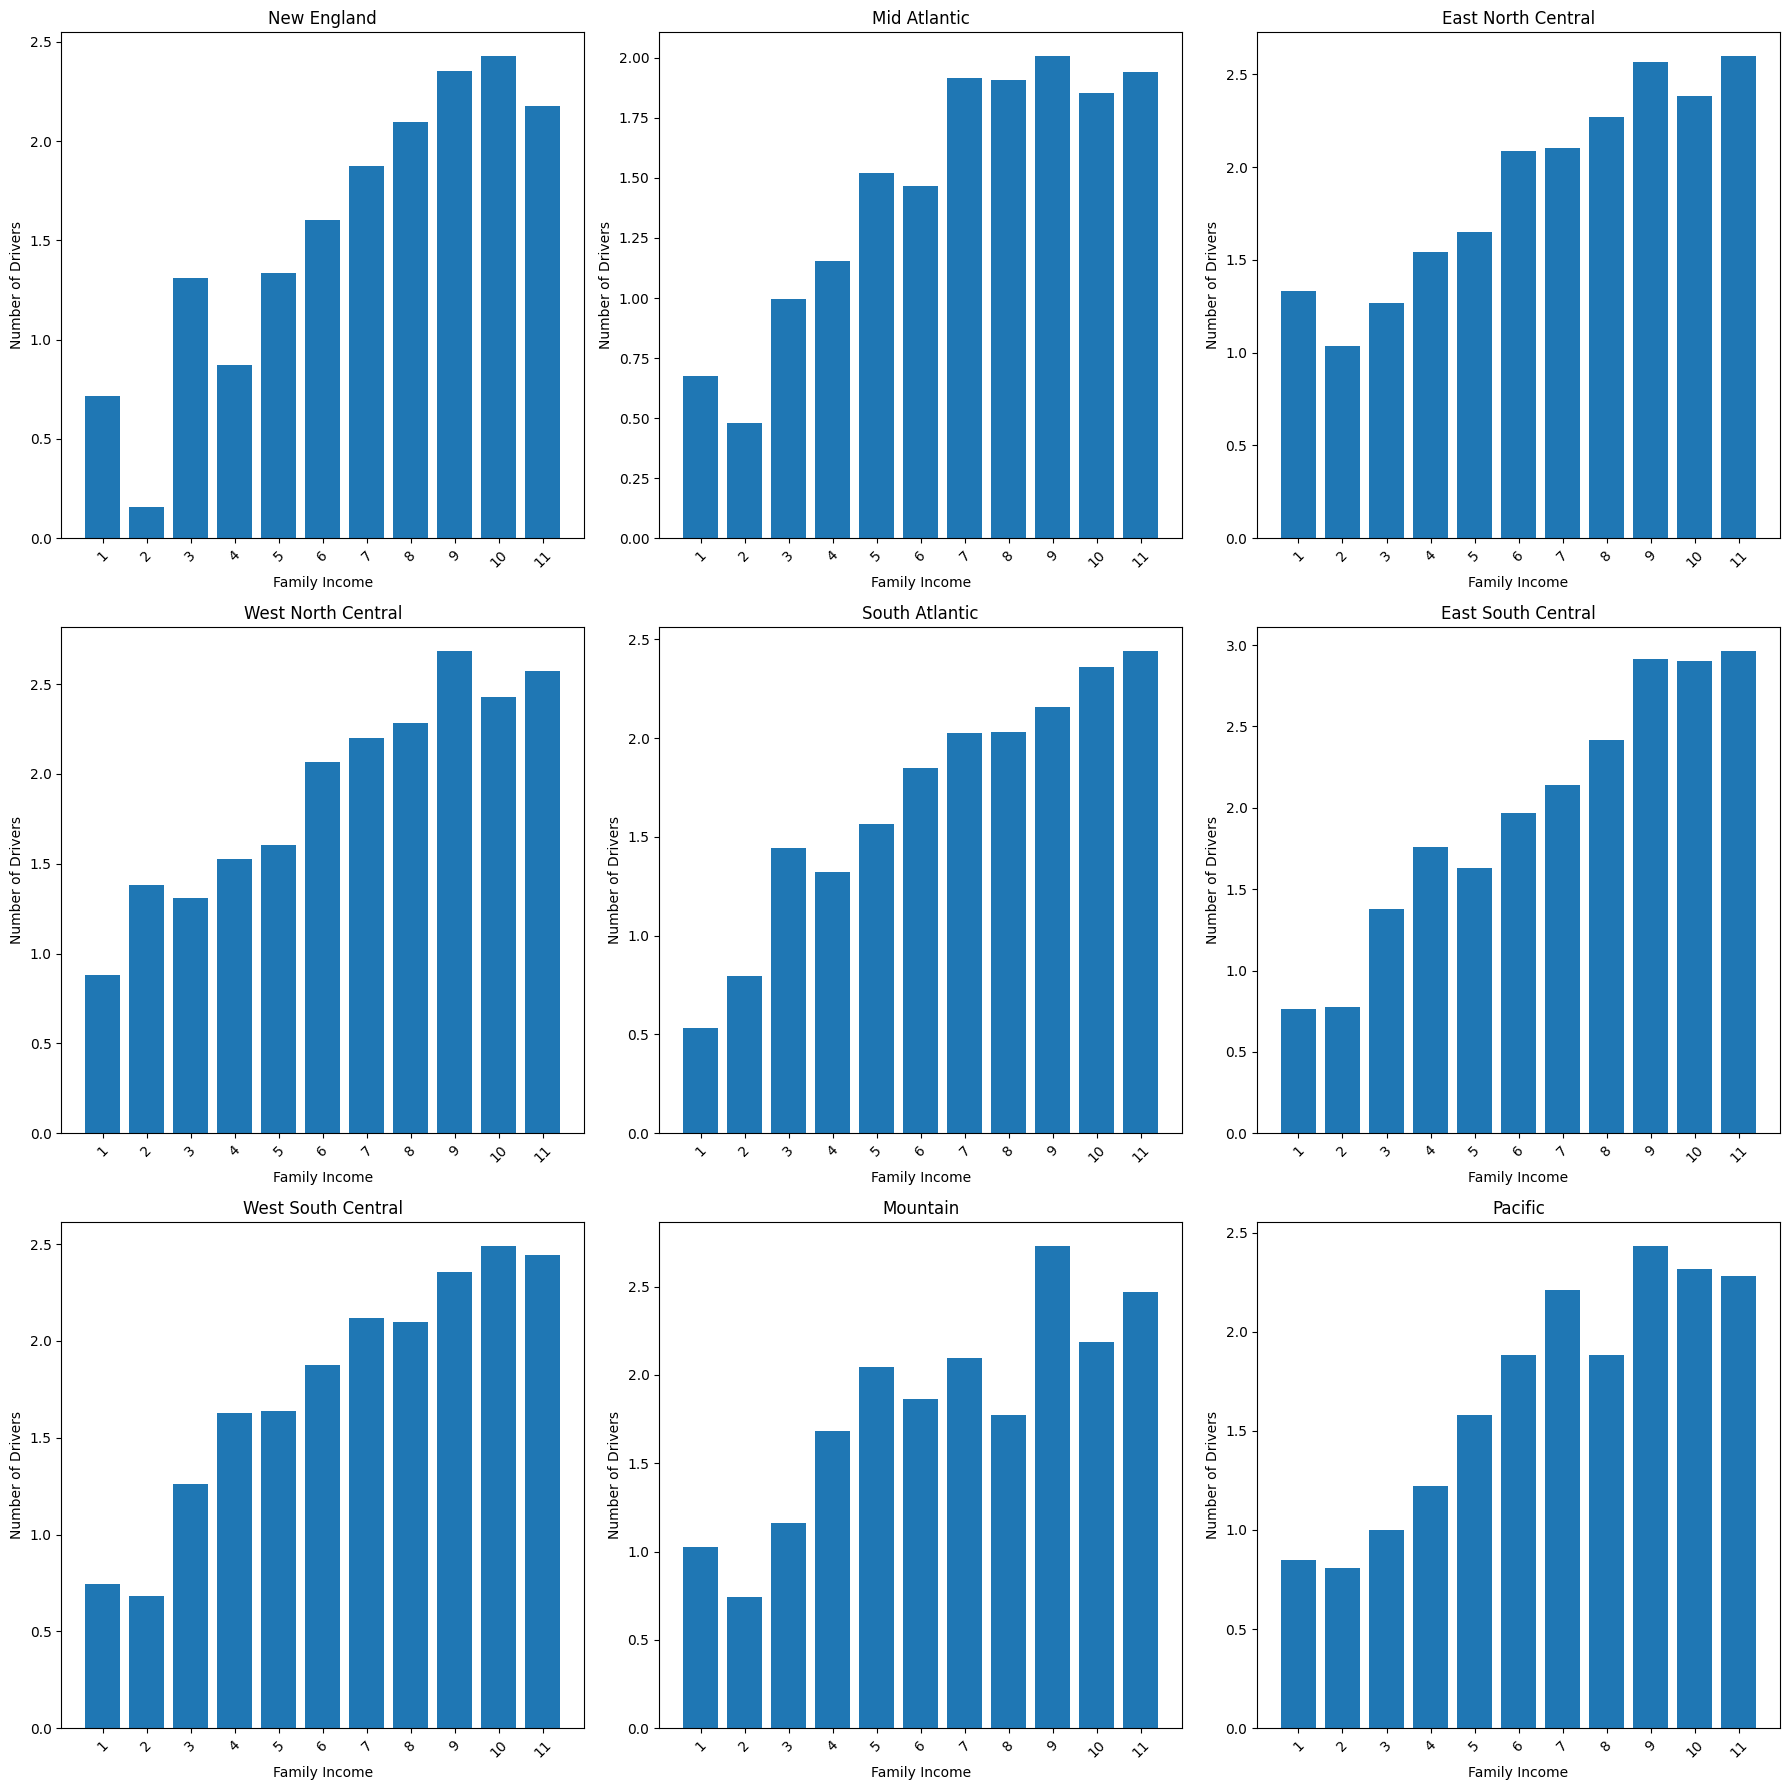

In [7]:
# Splitting urban and rural areas
excluded_values = [-7, -8]
hhv2 = hhv[~hhv['HHFAMINC'].isin(excluded_values)]

newEngland_df = hhv2[hhv2['CENSUS_D'] == 1]
midAtlantic_df = hhv2[hhv2['CENSUS_D'] == 2]
eastNorthCentral_df = hhv2[hhv2['CENSUS_D'] == 3]
westNorthCentral_df = hhv2[hhv2['CENSUS_D'] == 4]
southAtlantic_df = hhv2[hhv2['CENSUS_D'] == 5]
eastSouthCentral_df = hhv2[hhv2['CENSUS_D'] == 6]
westSouthCentral_df = hhv2[hhv2['CENSUS_D'] == 7]
mountain_df = hhv2[hhv2['CENSUS_D'] == 8]
pacific_df = hhv2[hhv2['CENSUS_D'] == 9]


# Aggregate the data to get the weighted mean of drivers per household income for each region
def weighted_mean(df, value_col, weight_col, group_col):
    df = df.copy()  # Avoid SettingWithCopyWarning
    df['weighted_value'] = df[value_col] * df[weight_col]
    grouped = df.groupby(group_col)[['weighted_value', weight_col]]
    weighted_df = grouped.sum().apply(
        lambda x: x['weighted_value'] / x[weight_col], axis=1
    ).reset_index(name=value_col)
    return weighted_df


newEngland_df = weighted_mean(newEngland_df, 'HHVEHCNT', 'WTHHFIN', 'HHFAMINC')
midAtlantic_df = weighted_mean(midAtlantic_df, 'HHVEHCNT', 'WTHHFIN', 'HHFAMINC')
eastNorthCentral_df = weighted_mean(eastNorthCentral_df, 'HHVEHCNT', 'WTHHFIN', 'HHFAMINC')
westNorthCentral_df = weighted_mean(westNorthCentral_df, 'HHVEHCNT', 'WTHHFIN', 'HHFAMINC')
southAtlantic_df = weighted_mean(southAtlantic_df, 'HHVEHCNT', 'WTHHFIN', 'HHFAMINC')
eastSouthCentral_df = weighted_mean(eastSouthCentral_df, 'HHVEHCNT', 'WTHHFIN', 'HHFAMINC')
westSouthCentral_df = weighted_mean(westSouthCentral_df, 'HHVEHCNT', 'WTHHFIN', 'HHFAMINC')
mountain_df = weighted_mean(mountain_df, 'HHVEHCNT', 'WTHHFIN', 'HHFAMINC')
pacific_df = weighted_mean(pacific_df, 'HHVEHCNT', 'WTHHFIN', 'HHFAMINC')

# Plot the bar charts for all regions
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))

# Define the regions and their titles
regions = [
    (newEngland_df, 'New England'),
    (midAtlantic_df, 'Mid Atlantic'),
    (eastNorthCentral_df, 'East North Central'),
    (westNorthCentral_df, 'West North Central'),
    (southAtlantic_df, 'South Atlantic'),
    (eastSouthCentral_df, 'East South Central'),
    (westSouthCentral_df, 'West South Central'),
    (mountain_df, 'Mountain'),
    (pacific_df, 'Pacific')
]

# Loop through each region and plot
for ax, (region_df, title) in zip(axes.flatten(), regions):
    ax.bar(region_df['HHFAMINC'], region_df['HHVEHCNT'])
    ax.set_xlabel('Family Income')
    ax.set_ylabel('Number of Drivers')
    ax.set_title(title)
    ax.set_xticks(region_df['HHFAMINC'])
    ax.set_xticklabels(region_df['HHFAMINC'].astype(int), rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

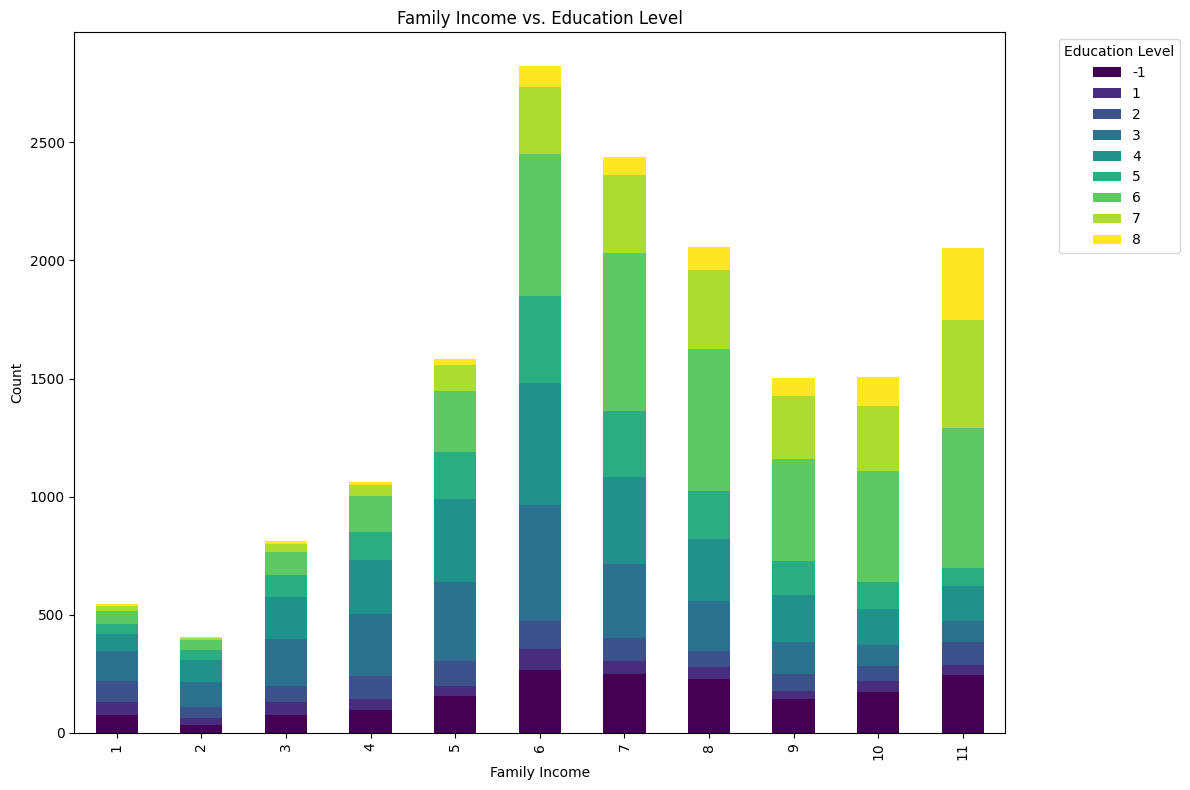

In [8]:
# Exclude invalid or missing values for family income and education level
excluded_values = [-7, -8, -9]  # Adjust based on your dataset's documentation
perv = perv[~perv['HHFAMINC'].isin(excluded_values)]
perv = perv[~perv['EDUC'].isin(excluded_values)]

# Create a crosstab of family income and education level
crosstab = pd.crosstab(perv['HHFAMINC'], perv['EDUC'])

# Plot the stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.xlabel('Family Income')
plt.ylabel('Count')
plt.title('Family Income vs. Education Level')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

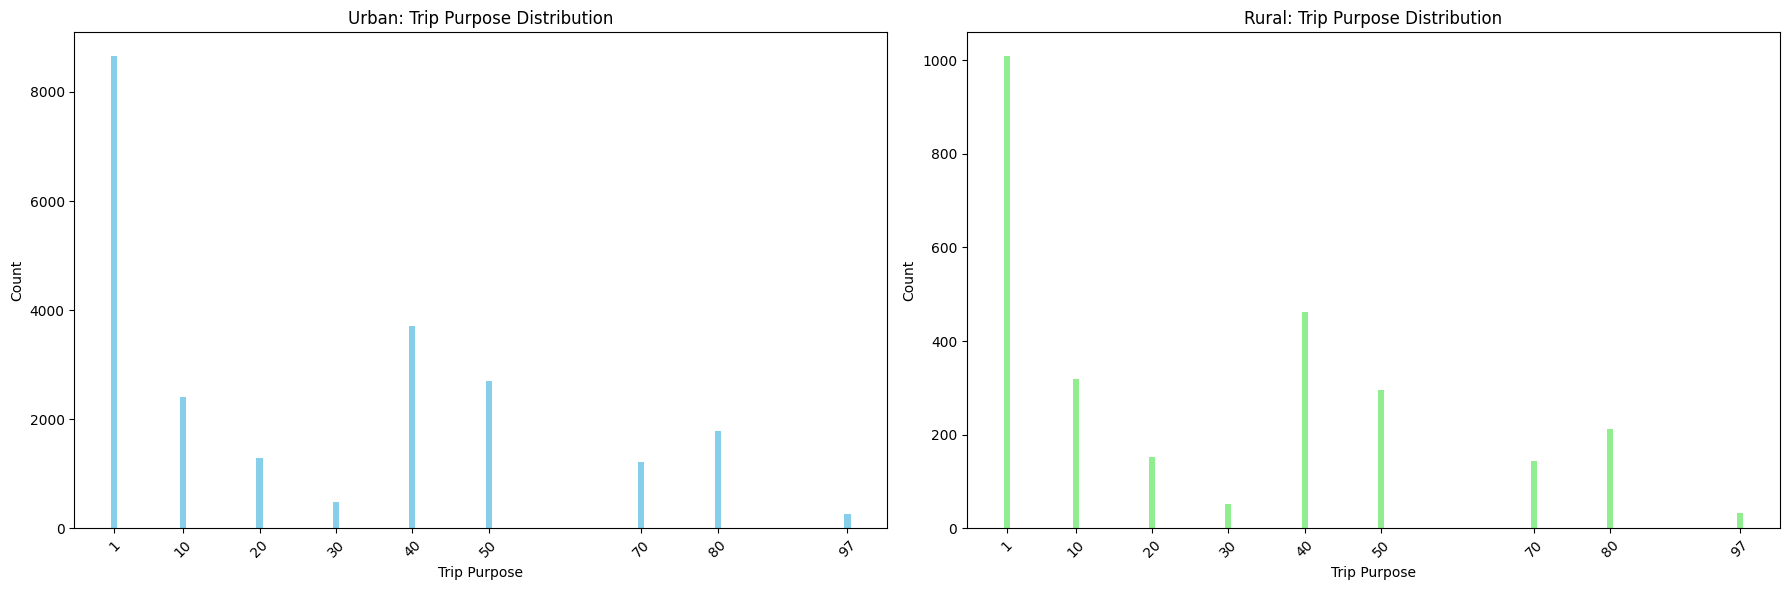

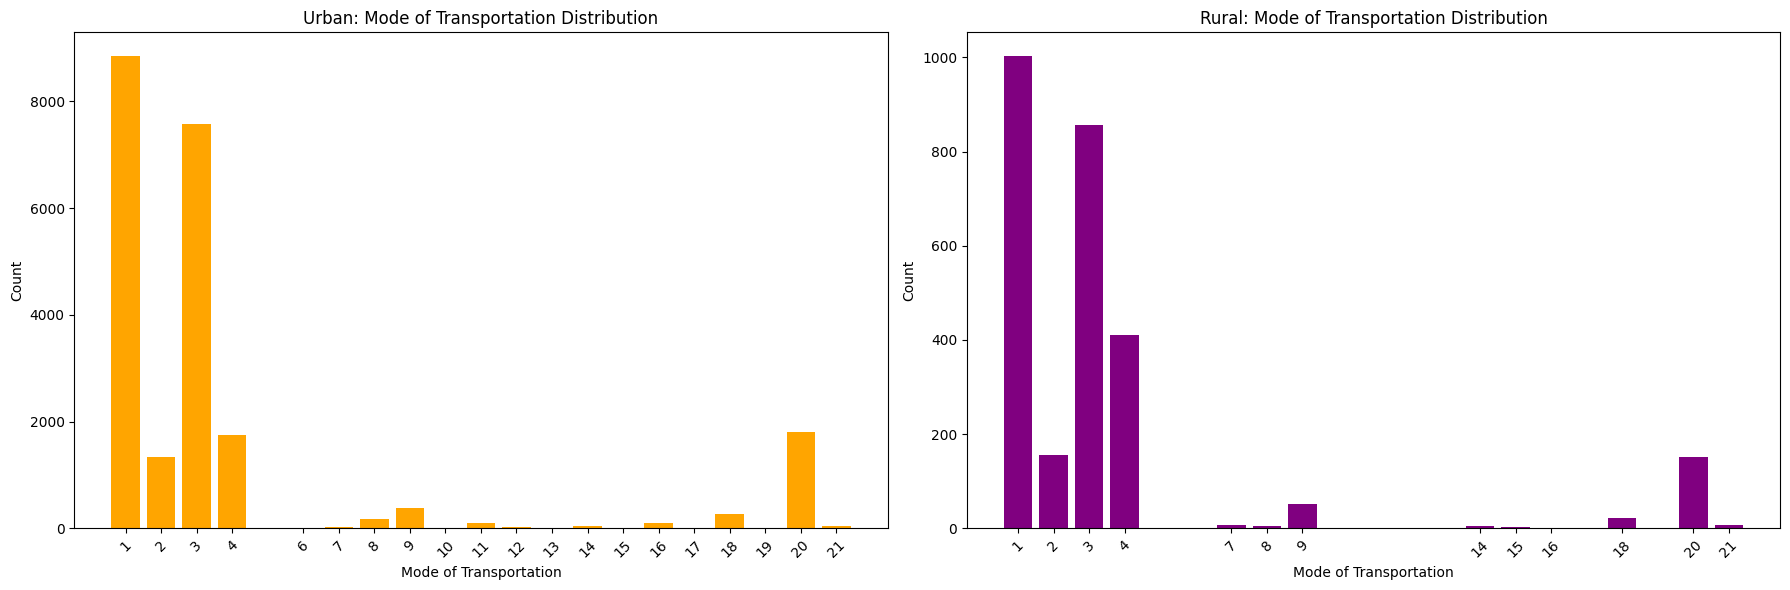

In [11]:
# Filter urban and rural trips based on the 'URBAN' column in the household dataset
urban_trips = trip[trip['HOUSEID'].isin(hhv[hhv['URBAN'] == 1]['HOUSEID'])]
rural_trips = trip[trip['HOUSEID'].isin(hhv[hhv['URBAN'] == 2]['HOUSEID'])]

# Aggregate data for trip purpose and mode of transportation
urban_trip_purpose = urban_trips['WHYTRP1S'].value_counts()
rural_trip_purpose = rural_trips['WHYTRP1S'].value_counts()

urban_transport_mode = urban_trips['TRPTRANS'].value_counts()
rural_transport_mode = rural_trips['TRPTRANS'].value_counts()

# Plot trip purpose distribution
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Urban trip purpose
axes[0].bar(urban_trip_purpose.index, urban_trip_purpose.values, color='skyblue')
axes[0].set_title('Urban: Trip Purpose Distribution')
axes[0].set_xlabel('Trip Purpose')
axes[0].set_ylabel('Count')
axes[0].set_xticks(urban_trip_purpose.index)
axes[0].set_xticklabels(urban_trip_purpose.index, rotation=45)

# Rural trip purpose
axes[1].bar(rural_trip_purpose.index, rural_trip_purpose.values, color='lightgreen')
axes[1].set_title('Rural: Trip Purpose Distribution')
axes[1].set_xlabel('Trip Purpose')
axes[1].set_ylabel('Count')
axes[1].set_xticks(rural_trip_purpose.index)
axes[1].set_xticklabels(rural_trip_purpose.index, rotation=45)

plt.tight_layout()
plt.show()

# Plot mode of transportation distribution
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Urban mode of transportation
axes[0].bar(urban_transport_mode.index, urban_transport_mode.values, color='orange')
axes[0].set_title('Urban: Mode of Transportation Distribution')
axes[0].set_xlabel('Mode of Transportation')
axes[0].set_ylabel('Count')
axes[0].set_xticks(urban_transport_mode.index)
axes[0].set_xticklabels(urban_transport_mode.index, rotation=45)

# Rural mode of transportation
axes[1].bar(rural_transport_mode.index, rural_transport_mode.values, color='purple')
axes[1].set_title('Rural: Mode of Transportation Distribution')
axes[1].set_xlabel('Mode of Transportation')
axes[1].set_ylabel('Count')
axes[1].set_xticks(rural_transport_mode.index)
axes[1].set_xticklabels(rural_transport_mode.index, rotation=45)

plt.tight_layout()
plt.show()